<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/Hierarchichal_Clustering_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [25]:
credit_card = pd.read_csv('/content/CC GENERAL.csv')
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
credit_card = credit_card.drop(['CUST_ID'], axis=1)

In [27]:
credit_card.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [28]:
credit_card.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [29]:
credit_card['MINIMUM_PAYMENTS']=credit_card.MINIMUM_PAYMENTS.fillna(0)

In [30]:
credit_card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
credit_card['CREDIT_LIMIT'] = credit_card.CREDIT_LIMIT.fillna(0)

In [33]:
credit_card.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [34]:
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(credit_card)

In [35]:
cc_norm = normalize(cc_scaled)
cc_norm = pd.DataFrame(cc_norm)
cc_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312186,-0.106381,-0.181215,-0.152229,-0.148878,-0.199079,-0.343960,-0.289442,-0.301662,-0.288029,-0.203039,-0.218078,-0.409521,-0.225604,-0.126799,-0.224142,0.153826
1,0.219903,0.037535,-0.131209,-0.099739,-0.127024,0.728094,-0.341401,-0.189641,-0.256239,0.160385,0.030758,-0.165368,0.192451,0.228756,0.028514,0.065451,0.100786
2,0.126694,0.146797,-0.030507,0.030853,-0.128803,-0.132262,0.359806,0.757513,-0.259827,-0.191358,-0.134893,-0.030890,0.234081,-0.108750,-0.025073,-0.148913,0.102197
3,0.020362,-0.421735,0.096235,0.226507,-0.188515,-0.152882,-0.420562,-0.165599,-0.380282,-0.107372,-0.136659,-0.228736,0.342599,-0.248279,-0.148064,-0.217948,0.149575
4,-0.151696,0.219054,-0.195368,-0.146841,-0.192202,-0.197364,-0.428788,-0.168838,-0.387720,-0.285548,-0.201290,-0.233210,-0.382754,-0.154060,-0.106650,-0.222211,0.152501


In [61]:
pca = PCA(n_components=2)
x_pc = pca.fit_transform(cc_norm)
x_pc = pd.DataFrame(x_pc)
x_pc.columns=['PC1','PC2']
x_pc.head()

,PC1,PC2
0,-0.490758,-0.679041
1,-0.518463,0.545356
2,0.330940,0.269071
3,-0.475763,-0.112025
4,-0.564121,-0.480475


In [62]:
var = pca.explained_variance_ratio_
var

array([0.29044997, 0.1840795 ])

In [63]:
var1 = np.cumsum(np.round(var,4)*100)
var1

array([29.04, 47.45])

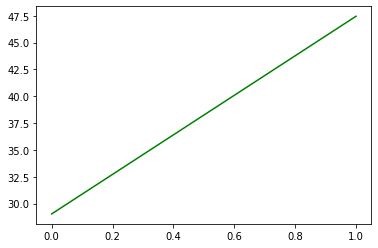

In [64]:
plt.plot(var1,color='green')
plt.show()

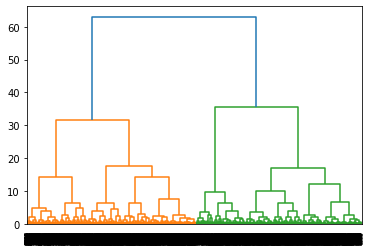

In [67]:
dendrogram = sch.dendrogram(sch.linkage(x_pc, method='ward'))

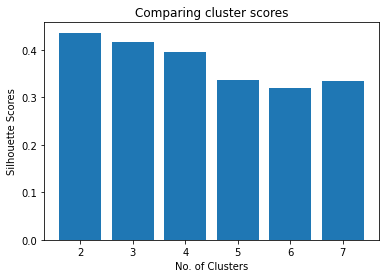

In [68]:
silhouette_scores = []
for i in range(2,8):
  silhouette_scores.append(
      silhouette_score(x_pc, AgglomerativeClustering(n_clusters=i).fit_predict(x_pc)))

k = [2,3,4,5,6,7]
plt.title('Comparing cluster scores')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Scores')
plt.bar(k,silhouette_scores)
plt.show()

In [73]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_hc = hc.fit_predict(x_pc)

In [76]:
credit_card['ClusterID'] = pd.DataFrame(y_hc)

In [77]:
credit_card

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ClusterID
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0
